In [30]:
from IPython.display import HTML

HTML('''

<style>

input[type=submit] {
  width: 100%;
  background-color: #4CAF50;
  color: white;
  padding: 14px 20px;
  margin: 8px 0;
  border: none;
  border-radius: 4px;
  cursor: pointer;
}

input[type=submit]:hover {
  background-color: #45a049;
}
</style>

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show / Hide Code"></form>''')

In [31]:
from ipyaggrid import Grid
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import re
import numpy as np


In [32]:
sns.set(style="darkgrid")
register_matplotlib_converters()
plt.rcParams['figure.figsize'] = [20, 10]

a4_dims = (11.7, 8.27)

In [33]:
dfm = pd.read_csv('pivoted.csv',delimiter=',', encoding="utf-8-sig")
dfm['startDate'] = pd.to_datetime(dfm['startDate'])

dfm.set_index('startDate', inplace=False)
dfm.index = pd.to_datetime(dfm.index)


dfm.columns = [x.replace('HKQuantityTypeIdentifier','') for x in dfm.columns]

dfm.columns = [re.sub(r"(\w)([A-Z])", r"\1 \2", x) for x in dfm.columns]


In [34]:
def make_grid(dataframe):
    grid_options = {
        #'columnDefs' : column_defs,
        'enableSorting': True,
        'enableFilter': True,
        'enableColResize': True,
        'enableRangeSelection': True,
    }
    g = Grid(grid_data=dataframe,
         grid_options=grid_options,
         quick_filter=True,
         show_toggle_edit=True,
         export_mode="buttons",
         export_csv=True,
         export_excel=True,
         theme='ag-theme-balham',
         show_toggle_delete=True,
         columns_fit='auto',
         index=False,
         keep_multiindex=False)
    return g

In [35]:
make_grid(dfm)

Grid(columns_fit='auto', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{'name':…

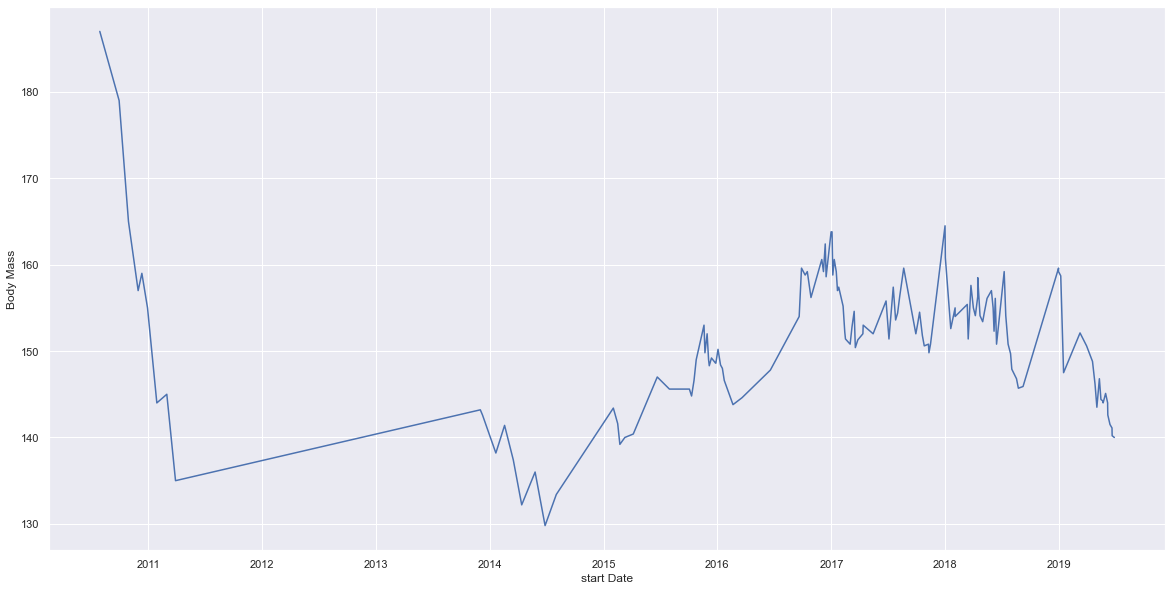

In [36]:
dfm_bodyMass = dfm.loc[pd.notna(dfm['Body Mass'])]
dfm_fat = dfm.loc[pd.notna(dfm['Body Fat Percentage'])]
dfm_flights = dfm.loc[pd.notna(dfm['Flights Climbed'])]
dfm_walkingrunning = dfm.loc[pd.notna(dfm['Distance Walking Running'])]
dfm_heart = dfm.loc[pd.notna(dfm['Heart Rate'])]

g = sns.lineplot(x="start Date", y="Body Mass", data=dfm_bodyMass)

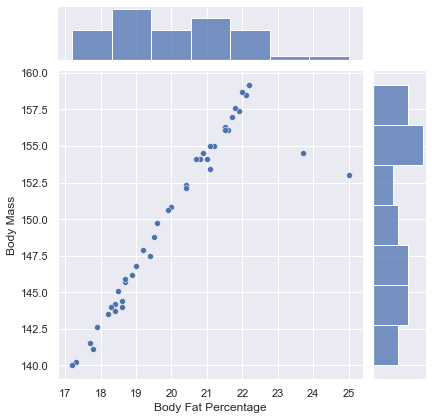

In [37]:
j = sns.jointplot(x='Body Fat Percentage', y='Body Mass', data=dfm_fat) 

/Users/jonathanrice/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


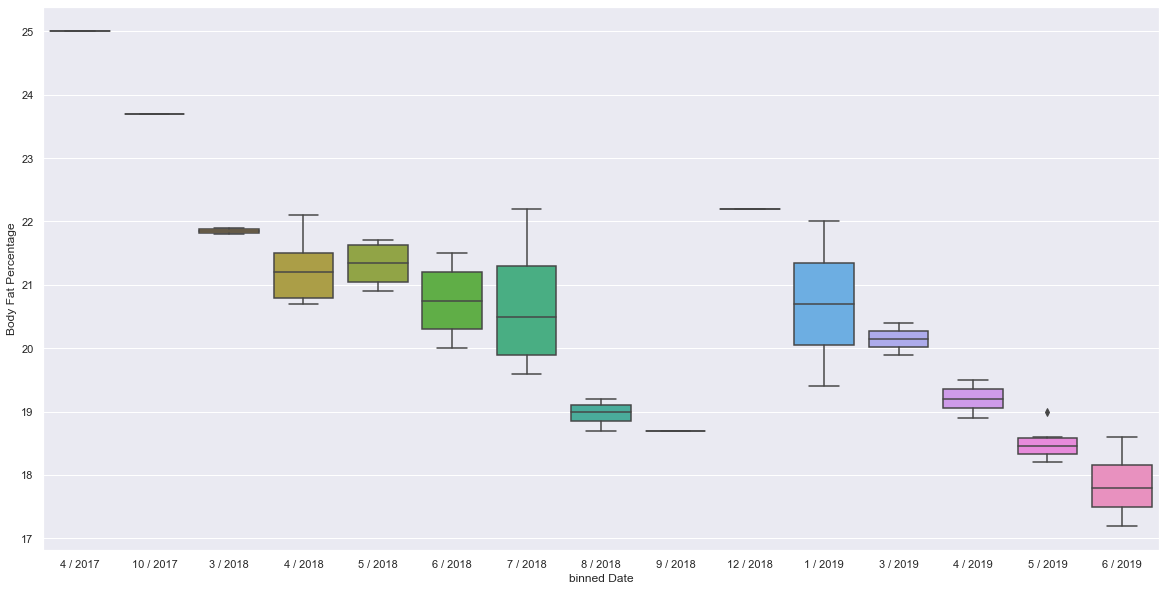

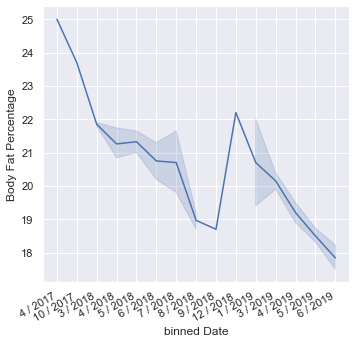

In [38]:
dfm_fat['binned Date'] =  dfm_fat['start Date'].dt.month.astype('str') + ' / ' +  dfm_fat['start Date'].dt.year.astype('str')

ax = sns.boxplot(x="binned Date", y="Body Fat Percentage", data=dfm_fat)

ax1 = sns.relplot(x="binned Date", y="Body Fat Percentage", kind="line", data=dfm_fat)
ax1.fig.autofmt_xdate()

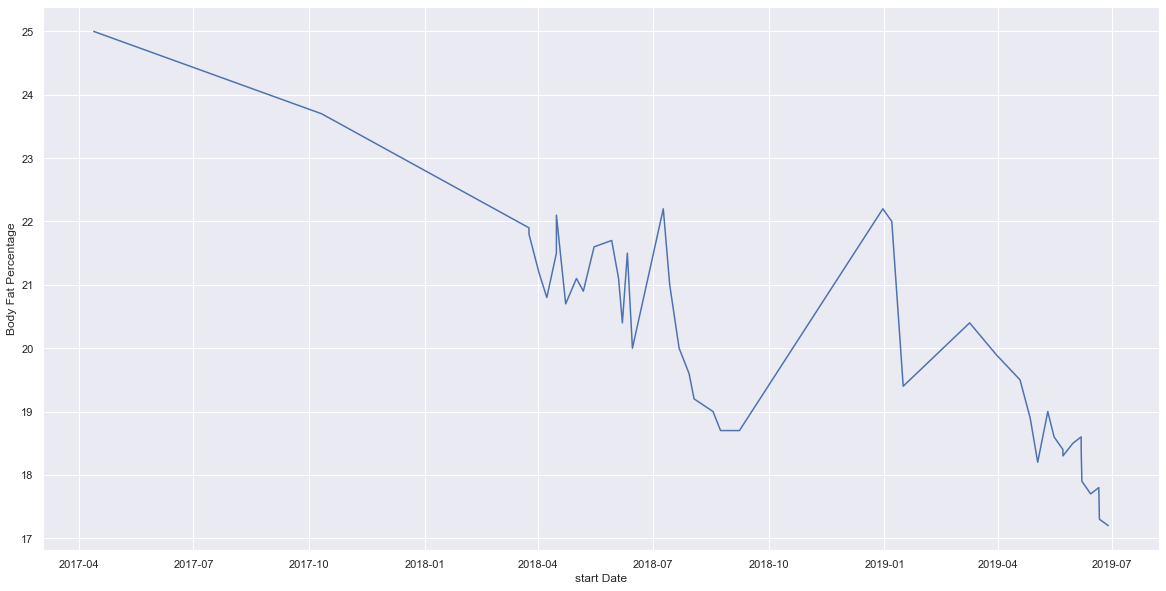

In [39]:
g = sns.lineplot(x="start Date", y="Body Fat Percentage", data=dfm_fat)

[]

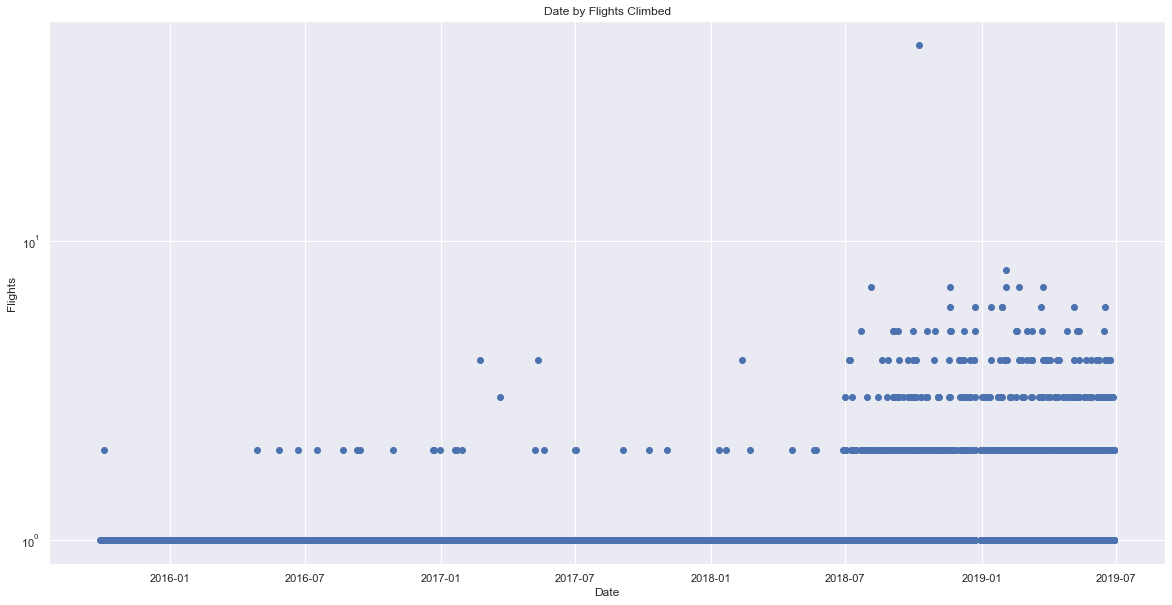

In [40]:
plt.scatter(dfm_flights['start Date'], dfm_flights['Flights Climbed'])
plt.title('Date by Flights Climbed')
ax = plt.gca()
ax.set_yscale('log')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.plot()

/Users/jonathanrice/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


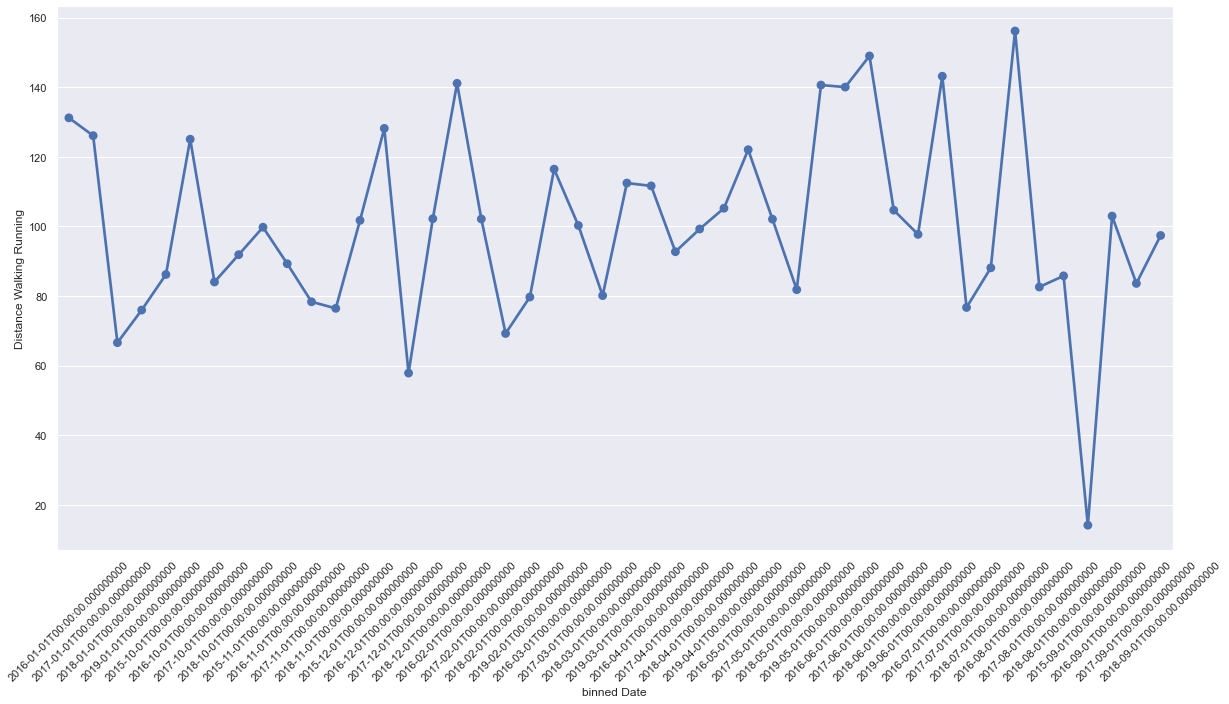

In [41]:
#dfm_walkingrunning.groupby(['Fruit','Name'])['Number'].sum().reset_index()
dfm_walkingrunning['binned Date'] = dfm_walkingrunning['start Date'].dt.month.astype('str') + ' / ' + dfm_walkingrunning['start Date'].dt.year.astype('str')
dfm_walkingrunning_sum = dfm_walkingrunning.groupby(['binned Date'])['Distance Walking Running'].sum().reset_index()
dfm_walkingrunning_sum['binned Date'] = pd.to_datetime(dfm_walkingrunning_sum['binned Date'])
plt.xticks(rotation=45)

ax = sns.pointplot(x="binned Date", y="Distance Walking Running", data=dfm_walkingrunning_sum)


In [42]:
dfm_heart


,Unnamed: 0,start Date,Active Energy Burned,Body Fat Percentage,Body Mass,Body Mass Index,Distance Cycling,Distance Walking Running,Flights Climbed,Heart Rate,Height,Lean Body Mass,Step Count
1970-01-01 00:00:00.000071699,71699,2018-04-01 18:51:49-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071700,71700,2018-04-01 18:53:10-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071702,71702,2018-04-01 19:00:27-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071704,71704,2018-04-01 20:47:51-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071764,71764,2018-04-02 21:50:27-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071793,71793,2018-04-03 21:00:31-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071824,71824,2018-04-04 20:07:30-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071929,71929,2018-04-08 00:11:22-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071932,71932,2018-04-08 19:44:19-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN
1970-01-01 00:00:00.000071983,71983,2018-04-09 19:01:51-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN


[]

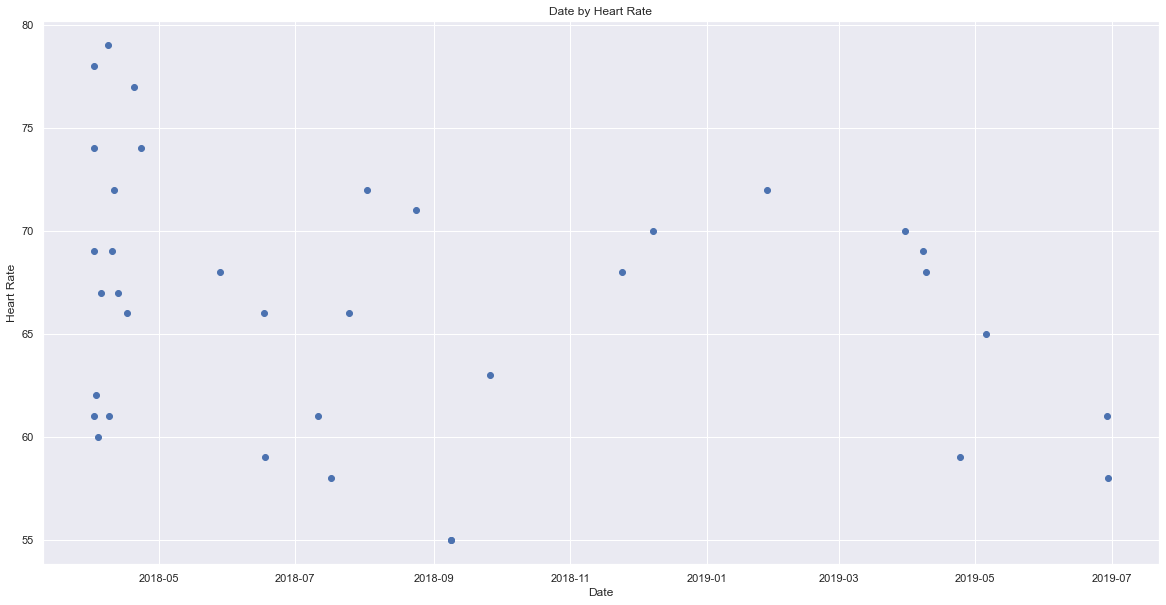

In [43]:
plt.scatter(dfm_heart['start Date'], dfm_heart['Heart Rate'])
plt.title('Date by Heart Rate')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.plot()

/Users/jonathanrice/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


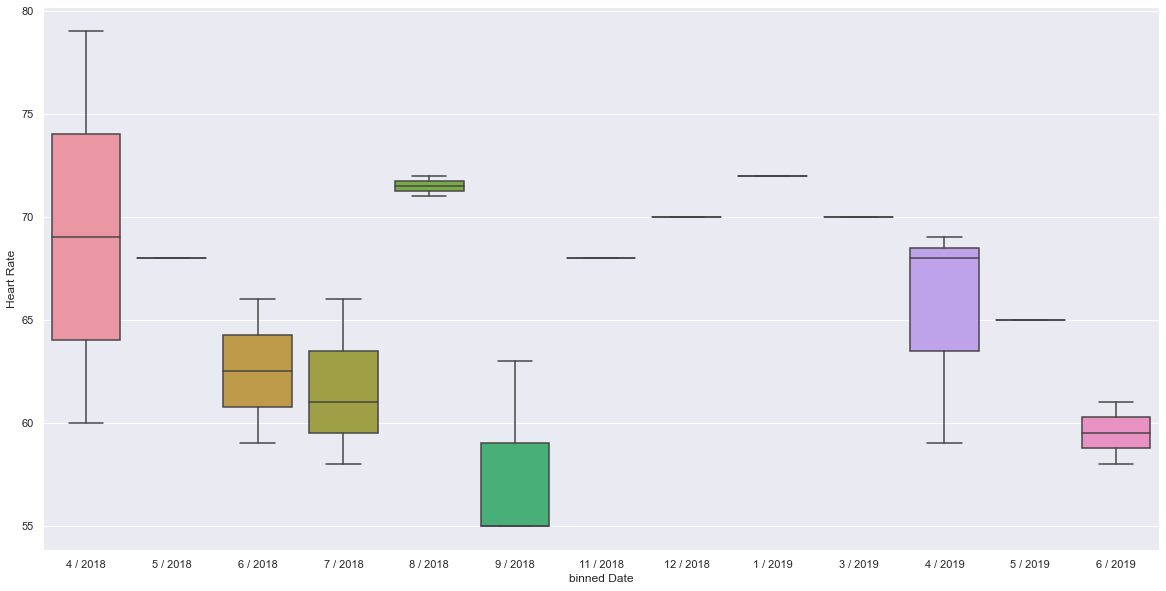

In [44]:
dfm_heart['binned Date'] =  dfm_heart['start Date'].dt.month.astype('str') + ' / ' +  dfm_heart['start Date'].dt.year.astype('str')

ax = sns.boxplot(x="binned Date", y="Heart Rate", data=dfm_heart)




In [45]:
df = pd.read_csv('pandas_dataframe.csv')
'''
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=df)
'''

/Users/jonathanrice/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,9,15,17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'\nsns.lineplot(x="timepoint", y="signal",\n             hue="region", style="event",\n             data=df)\n'

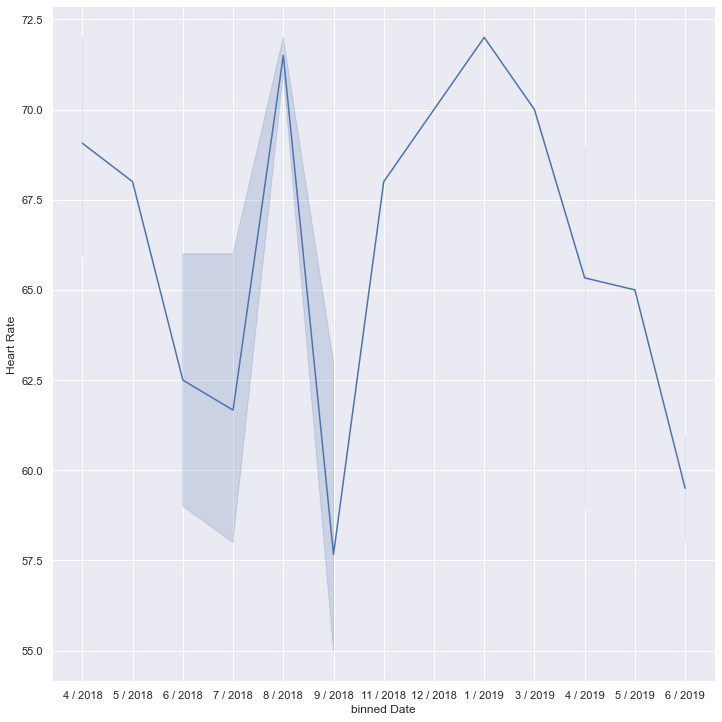

In [46]:
ax2 = sns.relplot(x="binned Date", y="Heart Rate", kind="line", data=dfm_heart, height=10)





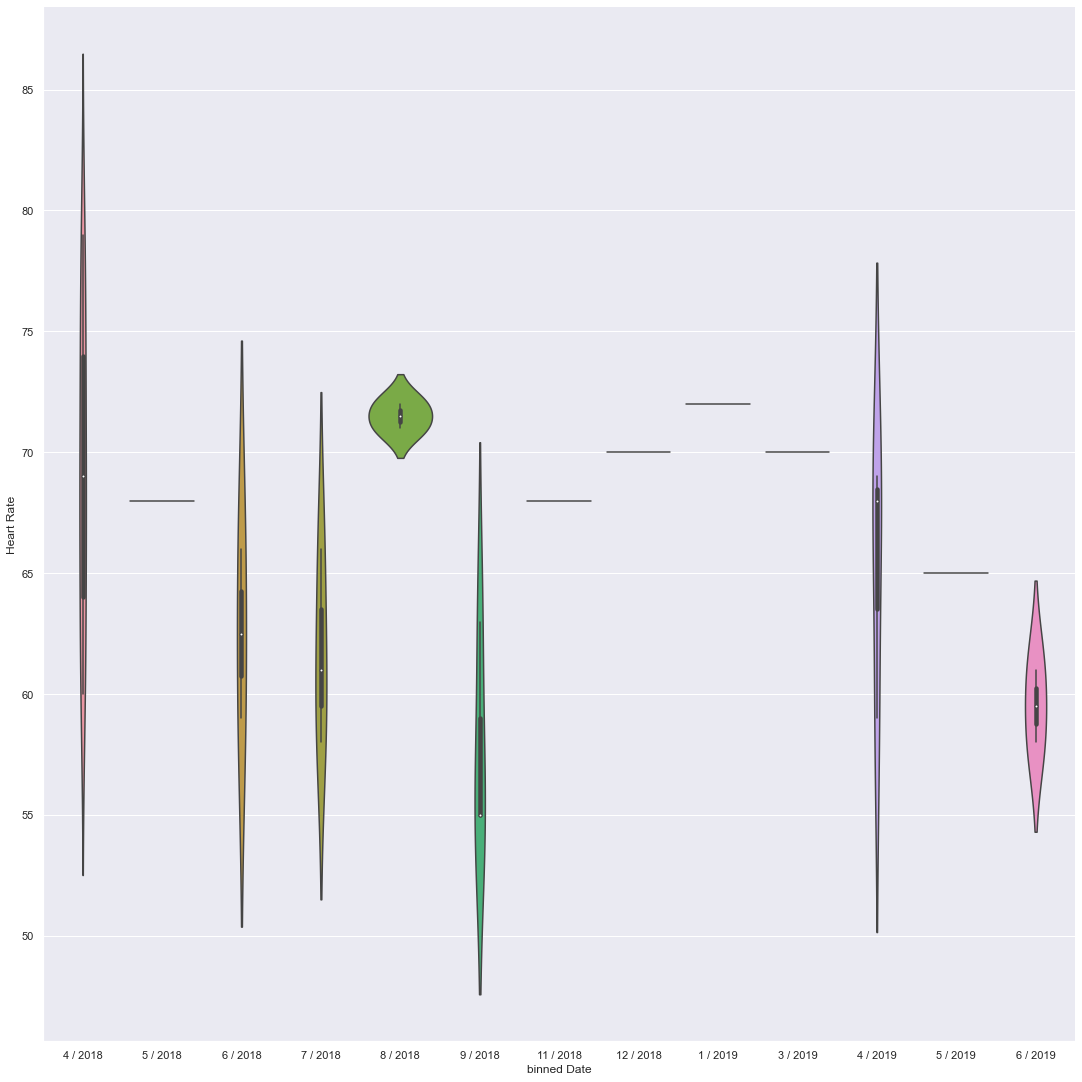

In [47]:

ax3 = sns.catplot(x="binned Date", y="Heart Rate",
            kind="violin", data=dfm_heart, height=15)

In [48]:
make_grid(df)

Grid(columns_fit='auto', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{'name':…

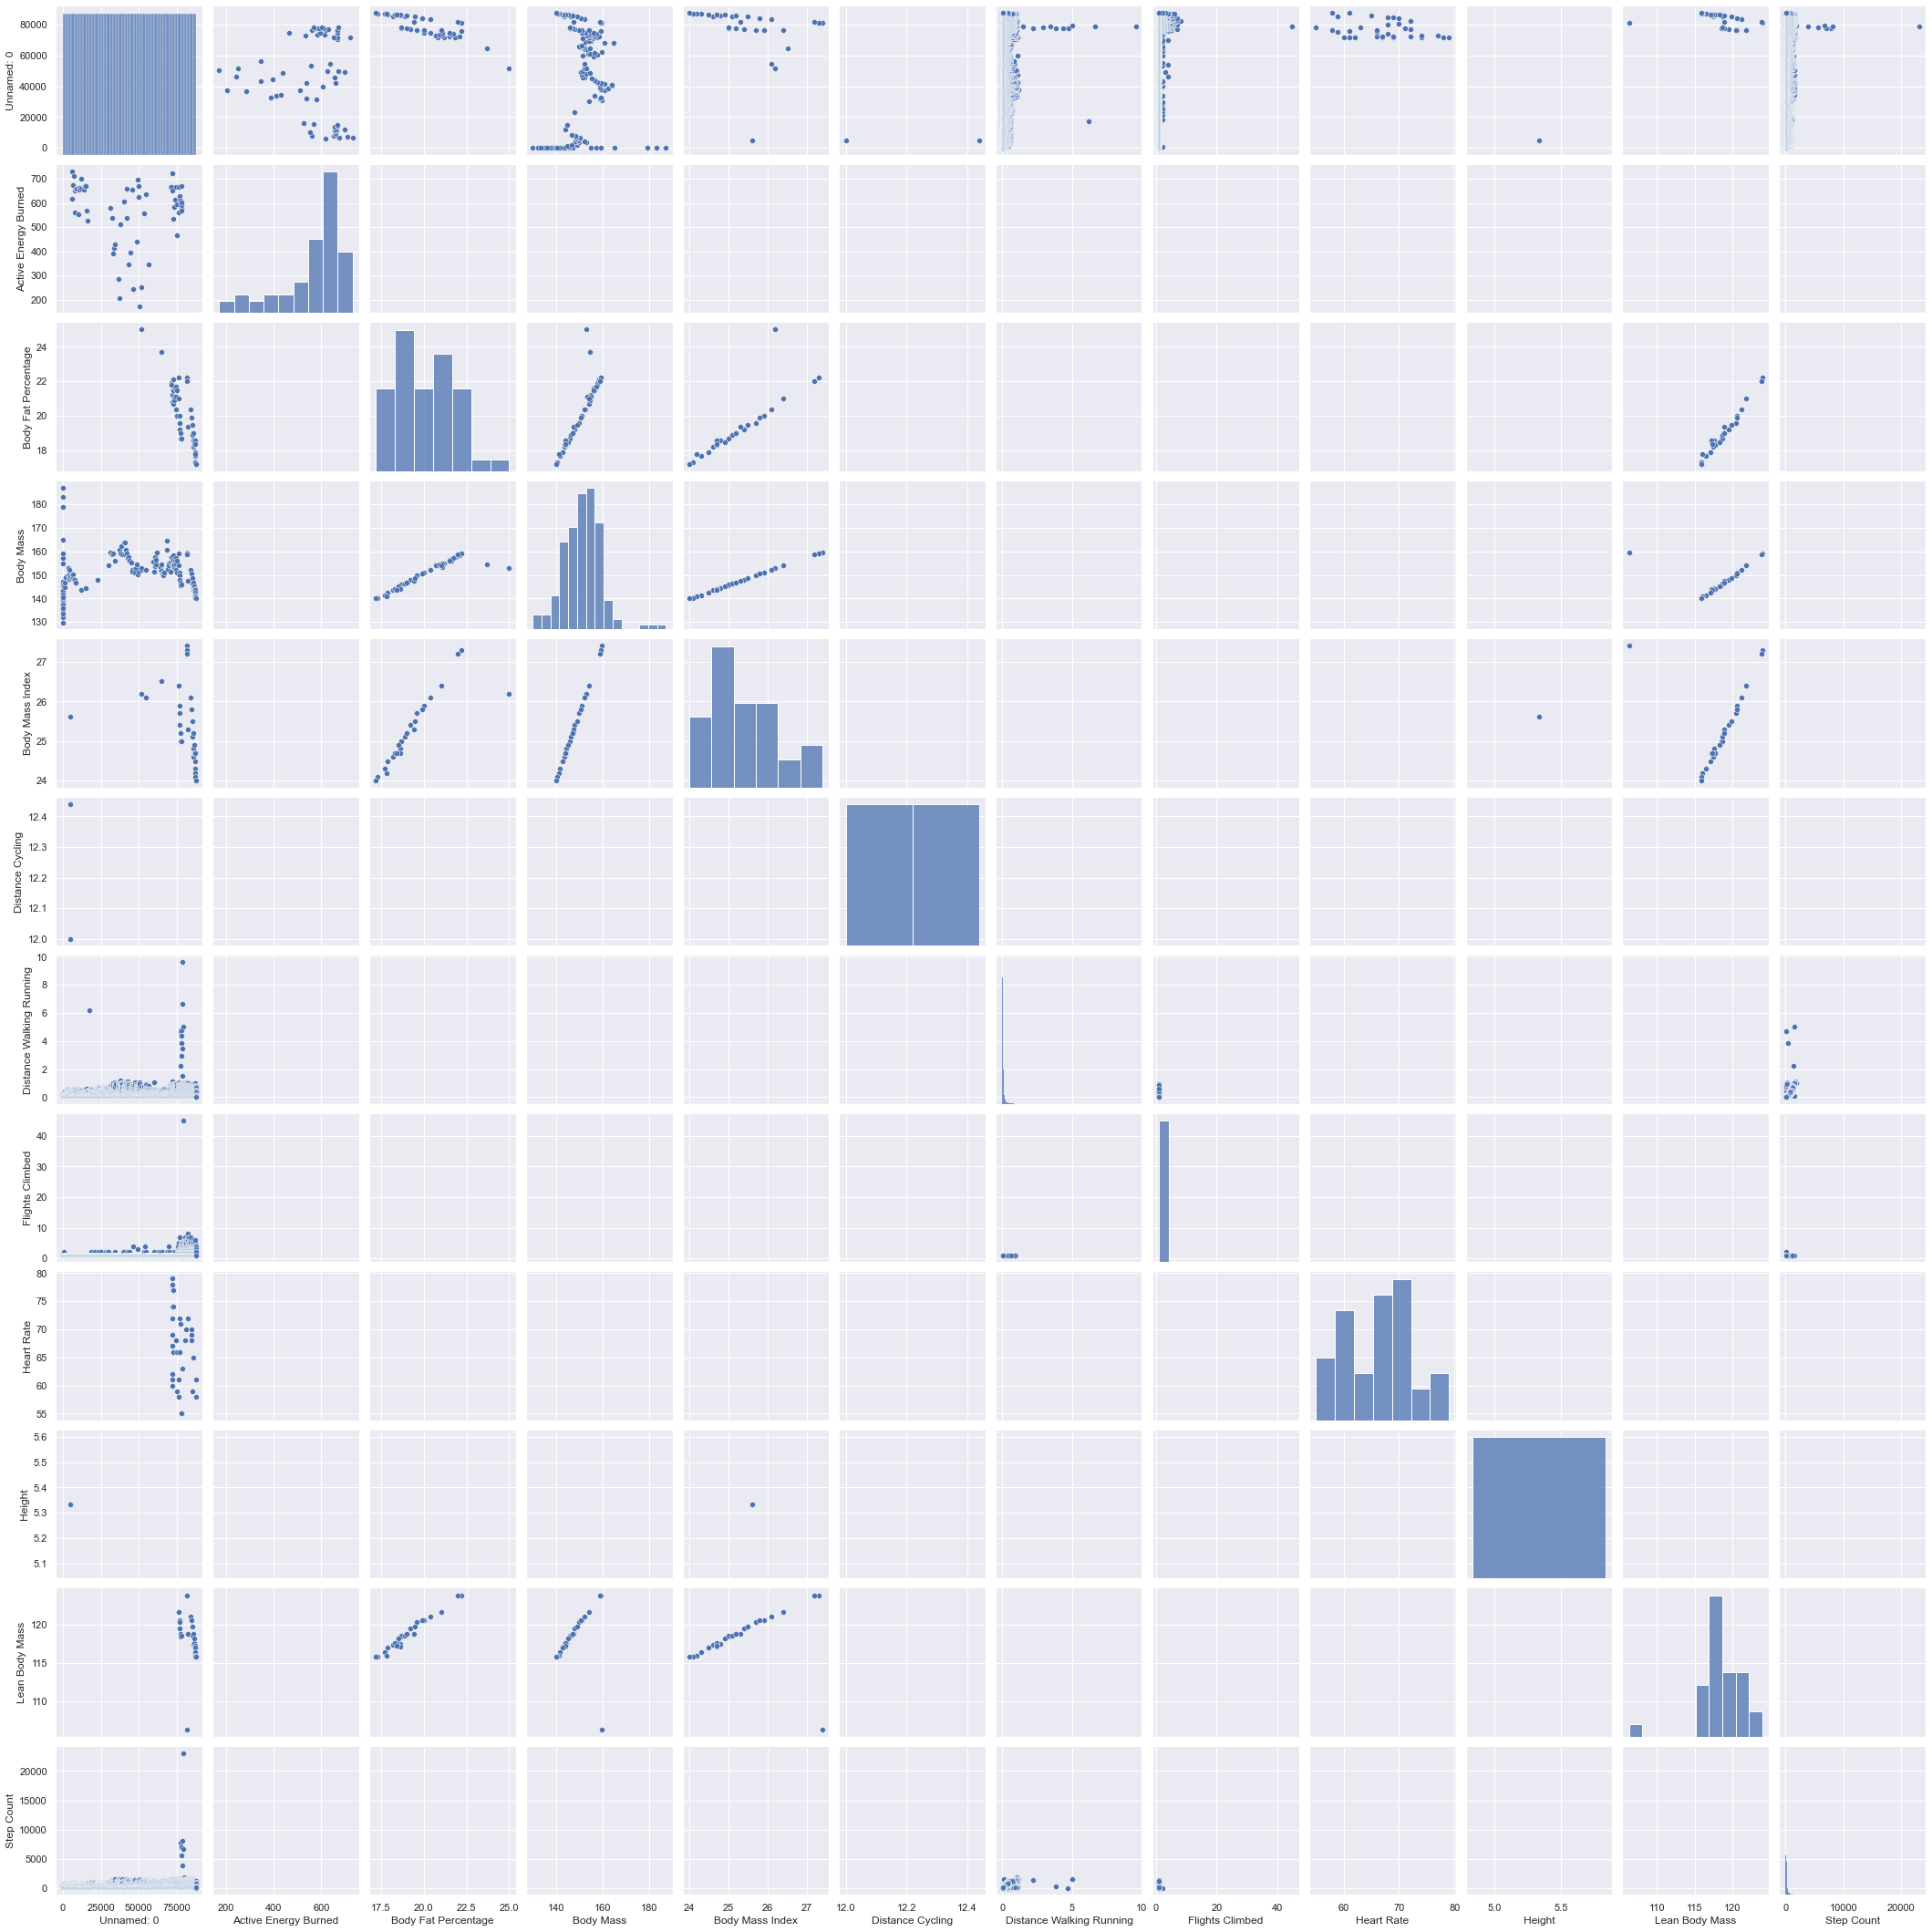

In [49]:
p = sns.pairplot(dfm)